<a href="https://colab.research.google.com/github/Coolicc/Big-Data-Analysis-PySpark/blob/main/2nd_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Za ovu vežbu potreban nam je skup podataka koji opisuje filmove od 1950-2011 godine.Ovo je tab-seperated fajl, pa treba to naglasiti prilikom učitavanja. Fajl nema header pa ćemo ih ručno dodati u naš DataFrame. Podaci se nalaze na adresi https://drive.google.com/file/d/1cofqaMyJP1dSB0g6gi4cDitkw_35LKRF/view?usp=sharing Preuzeti fajl, dodati ga u svoj google drive pa ga odatle mountovati u google colab notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1. Učitati potrebne biblioteke

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

#### 2. Kreirati listu zaglavlja tabele, učitati fajl i ispisati prvih 5 redova

In [ ]:
headers = ['Code', 'Name', 'Year of Release', 'Review Score', 'Number of Reviews', 'Runtime', 'Genres']
data = pd.read_csv("/content/drive/My Drive/filmovi.txt", delimiter='\t', header=None, names=headers)
data.head()

,Code,Name,Year of Release,Review Score,Number of Reviews,Runtime,Genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


#### 3. Ispisati broj redova u DataFrame-u

In [ ]:
data.shape

(10000, 7)

#### 4 . Proveriti da li ima nepopunjenih vrednosti i uklonite ih

In [ ]:
nan_rows_exist = data[data.isnull().any(axis=1)].shape[0] > 0
if nan_rows_exist:
  data = data.dropna()
data.shape

(9999, 7)

#### 5. Kolonu runtime pretvotriti u broj i izbaciti  string mins.

In [ ]:
data['Runtime'] = data['Runtime'].apply(lambda x: int(x.replace(' mins.', '')))
data['Runtime']

0       142
1       154
2       139
3       136
4       148
       ... 
9995     78
9996    100
9997    104
9998    179
9999     96
Name: Runtime, Length: 9999, dtype: int64

#### 6. Kolona genres sadrži stringove razdvojene |. Izdvojiti sve pojedinačne žanrove i dodati kolone. Ako je film odrđenog žanra vrednost kolone će biti True

In [ ]:
genres = set()
for index, row in data.iterrows():
  film_genres = row['Genres'].split('|')
  for genre in film_genres:
    if genre in genres:
      data.loc[index, genre] = True
    else:
      data[genre] = False
      data.loc[index, genre] = True
      genres.add(genre)
data.head()

,Code,Name,Year of Release,Review Score,Number of Reviews,Runtime,Genres,Crime,Drama,Thriller,Mystery,Action,Adventure,Sci-Fi,Comedy,Romance,Fantasy,Biography,History,War,Family,Animation,Musical,Horror,Western,Sport,Music,Film-Noir,Adult,News,Reality-TV
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 7. Obrisati godinu iz naslova

In [ ]:
data['Name'] = data['Name'].apply(lambda x: x[:-7])
data.head()

,Code,Name,Year of Release,Review Score,Number of Reviews,Runtime,Genres,Crime,Drama,Thriller,Mystery,Action,Adventure,Sci-Fi,Comedy,Romance,Fantasy,Biography,History,War,Family,Animation,Musical,Horror,Western,Sport,Music,Film-Noir,Adult,News,Reality-TV
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 8. Pozvati funkciju describe nad numeričkim kolonama

In [ ]:
numeric_datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data.select_dtypes(include=numeric_datatypes).describe()

,Year of Release,Review Score,Number of Reviews,Runtime
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,1993.471447,6.385989,16605.462946,103.580358
std,14.830049,1.189965,34564.883945,26.629310
min,1950.000000,1.500000,1356.000000,0.000000
25%,1986.000000,5.700000,2334.500000,93.000000
50%,1998.000000,6.600000,4981.000000,102.000000
75%,2005.000000,7.200000,15278.500000,115.000000
max,2011.000000,9.200000,619479.000000,450.000000


#### 9. Vrednost 0 za kolonu runtime deluje čudno. Prebrojati koliko takvih filmova ima i postavite im vrednost NaN kako ne bi uticalo na rezultate

In [ ]:
print(data[data['Runtime'] == 0]['Runtime'].count())
for index, row in data[data['Runtime'] == 0].iterrows():
  data.loc[index, 'Runtime']=np.nan
print(data[data['Runtime'] == 0]['Runtime'].count())
data.head(70)

282
0


,Code,Name,Year of Release,Review Score,Number of Reviews,Runtime,Genres,Crime,Drama,Thriller,Mystery,Action,Adventure,Sci-Fi,Comedy,Romance,Fantasy,Biography,History,War,Family,Animation,Musical,Horror,Western,Sport,Music,Film-Noir,Adult,News,Reality-TV
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154.0,Crime|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139.0,Drama|Mystery|Thriller,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,tt0119488,L.A. Confidential,1997,8.4,187115,138.0,Crime|Drama|Mystery|Thriller,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
66,tt0457430,Pan's Labyrinth,2006,8.4,186080,NaN,Drama|Fantasy|Mystery,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
67,tt0126029,Shrek,2001,7.9,185372,90.0,Animation|Adventure|Comedy|Family|Fantasy,False,False,False,False,False,True,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False
68,tt1119646,The Hangover,2009,7.9,182689,100.0,Comedy|Crime,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 10. Prikazati histograme za godinu, rating, runtime

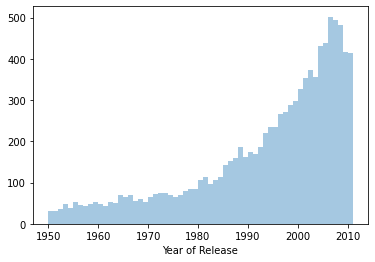

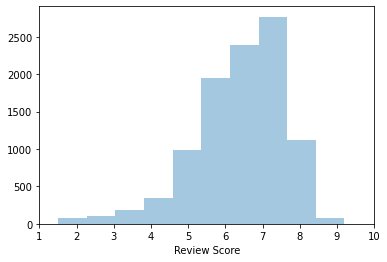

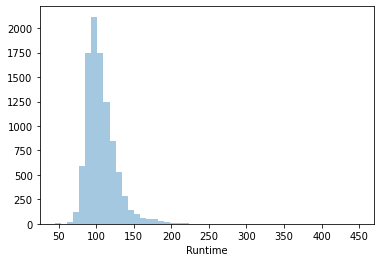

In [ ]:
#data.hist(column='Year of Release', bins=100)
# data.hist(column='Review Score', bins=100)
# data.hist(column='Runtime', bins=100)
sn.distplot(data['Year of Release'], kde=False, bins=61)
plt.figure()
sn.distplot(data['Review Score'], kde=False, bins=10)
plt.xlim([1,10])
plt.figure()
sn.distplot(data['Runtime'], kde=False)

#### 11. Prikazati scatter grafikon sa godinama i rejtingom

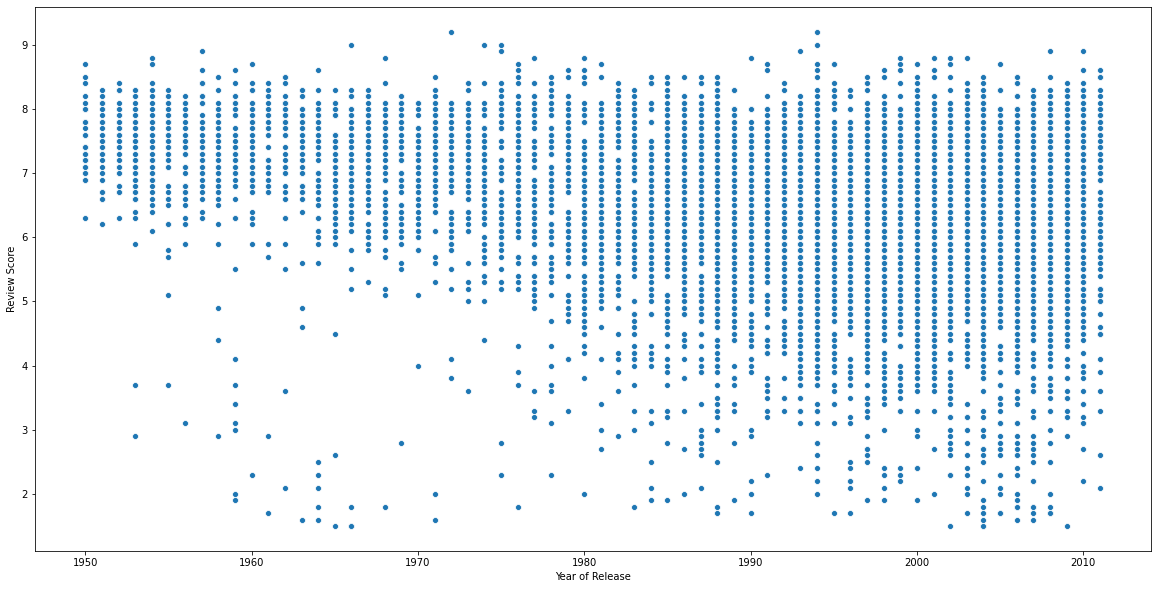

In [ ]:
plt.figure(figsize=(20, 10))
sn.scatterplot(x='Year of Release', y='Review Score', data=data)

#### 12. Prikazati filmove koje je puno ljudi ocenilo loše (ocena manja od 5 i broj glasova preko 90000)

In [ ]:
data[(data['Review Score'] < 5) & (data['Number of Reviews'] > 90000)]

,Code,Name,Year of Release,Review Score,Number of Reviews,Runtime,Genres,Crime,Drama,Thriller,Mystery,Action,Adventure,Sci-Fi,Comedy,Romance,Fantasy,Biography,History,War,Family,Animation,Musical,Horror,Western,Sport,Music,Film-Noir,Adult,News,Reality-TV
317,tt1259571,New Moon,2009,4.5,90457,130.0,Adventure|Drama|Fantasy|Romance,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
334,tt0118688,Batman & Robin,1997,3.5,91875,125.0,Action|Crime|Fantasy|Sci-Fi,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 13. Prikazati najlošije ocenjen film

In [ ]:
data[data['Review Score'] == data['Review Score'].min()]

,Code,Name,Year of Release,Review Score,Number of Reviews,Runtime,Genres,Crime,Drama,Thriller,Mystery,Action,Adventure,Sci-Fi,Comedy,Romance,Fantasy,Biography,History,War,Family,Animation,Musical,Horror,Western,Sport,Music,Film-Noir,Adult,News,Reality-TV
1982,tt0060666,Manos: The Hands of Fate,1966,1.5,20927,74.0,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2793,tt0270846,Superbabies: Baby Geniuses 2,2004,1.5,13196,88.0,Comedy|Family,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3746,tt0421051,Daniel the Wizard,2004,1.5,8271,81.0,Comedy|Crime|Family|Fantasy|Horror,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False
5158,tt0364986,Ben & Arthur,2002,1.5,4675,85.0,Drama|Romance,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5993,tt0060753,Night Train to Mundo Fine,1966,1.5,3542,89.0,Action|Adventure|Crime|War,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6257,tt0059464,Monster a-Go Go,1965,1.5,3255,70.0,Sci-Fi|Horror,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
6726,tt1309000,Dream Well,2009,1.5,2848,NaN,Comedy|Romance|Sport,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


#### 14. Prikazati najbolje ocenjen film

In [ ]:
data[data['Review Score'] == data['Review Score'].max()]

,Code,Name,Year of Release,Review Score,Number of Reviews,Runtime,Genres,Crime,Drama,Thriller,Mystery,Action,Adventure,Sci-Fi,Comedy,Romance,Fantasy,Biography,History,War,Family,Animation,Musical,Horror,Western,Sport,Music,Film-Noir,Adult,News,Reality-TV
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26,tt0068646,The Godfather,1972,9.2,474189,175.0,Crime|Drama,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 15. Koji žanr je najzastupljeniji?

In [ ]:
genre_freq = 0
most_freq_genre = ''
for genre in genres:
  freq = data[data[genre] == True]['Code'].count()
  if freq > genre_freq:
    genre_freq = freq
    most_freq_genre = genre
print(most_freq_genre + ' ' + str(genre_freq))

Drama 5697


#### 16. Koliko žanrova film ima u proseku?

In [ ]:
data[data[genres] == True].sum().sum() / data['Code'].count()

2.753975397539754

#### 17. Dodati kolonu dekada koja opisuje kojoj dekadi pripada film

In [ ]:
for index, row in data.iterrows():
  dec = str(row['Year of Release'])
  dec = dec[:3] + '0s'
  data.loc[index, 'Decade'] = dec
data.head()

,Code,Name,Year of Release,Review Score,Number of Reviews,Runtime,Genres,Crime,Drama,Thriller,Mystery,Action,Adventure,Sci-Fi,Comedy,Romance,Fantasy,Biography,History,War,Family,Animation,Musical,Horror,Western,Sport,Music,Film-Noir,Adult,News,Reality-TV,Decade
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1990s
1,tt0110912,Pulp Fiction,1994,9.0,490065,154.0,Crime|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1990s
2,tt0137523,Fight Club,1999,8.8,458173,139.0,Drama|Mystery|Thriller,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1990s
3,tt0133093,The Matrix,1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1990s
4,tt1375666,Inception,2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010s


####18. Grupisati filmove po dekadi i izračunati prosek rejtinga. Prikazati scatter graf na kome se vide odnosi ocene i godine a dodati crvenu liniju koja prikazuje prosečnu ocenu po dekadama

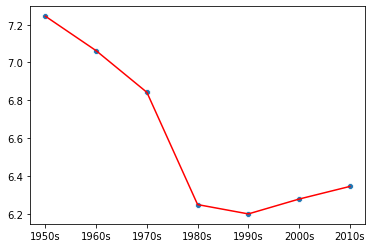

In [ ]:
decade_rating = data.groupby(by='Decade')['Review Score'].mean()
sn.scatterplot(data=decade_rating)
plt.plot(decade_rating, color='red')

#### 19. Za svaku godinu prikazati najbolje ocenjen film

In [ ]:
data.loc[data.groupby('Year of Release')['Review Score'].idxmax()]

,Code,Name,Year of Release,Review Score,Number of Reviews,Runtime,Genres,Crime,Drama,Thriller,Mystery,Action,Adventure,Sci-Fi,Comedy,Romance,Fantasy,Biography,History,War,Family,Animation,Musical,Horror,Western,Sport,Music,Film-Noir,Adult,News,Reality-TV,Decade
556,tt0043014,Sunset Blvd.,1950,8.7,64363,110.0,Drama|Film-Noir,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1950s
1034,tt0044079,Strangers on a Train,1951,8.3,40104,101.0,Crime|Film-Noir|Mystery|Romance|Thriller,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1950s
561,tt0045152,Singin' in the Rain,1952,8.4,63655,103.0,Comedy|Musical|Romance,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1950s
2350,tt0046268,The Wages of Fear,1953,8.3,16721,131.0,Drama|Thriller,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1950s
212,tt0047478,Seven Samurai,1954,8.8,111707,207.0,Adventure|Drama,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1950s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,tt0986264,Like Stars on Earth,2007,8.3,12624,165.0,Comedy|Drama,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000s
25,tt0468569,The Dark Knight,2008,8.9,555122,152.0,Action|Crime|Drama|Thriller,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000s
23,tt0361748,Inglourious Basterds,2009,8.4,240995,153.0,Adventure|Drama|War,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2000s
4,tt1375666,Inception,2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010s


#### 20. Napraviti grafikon za svaki žanr

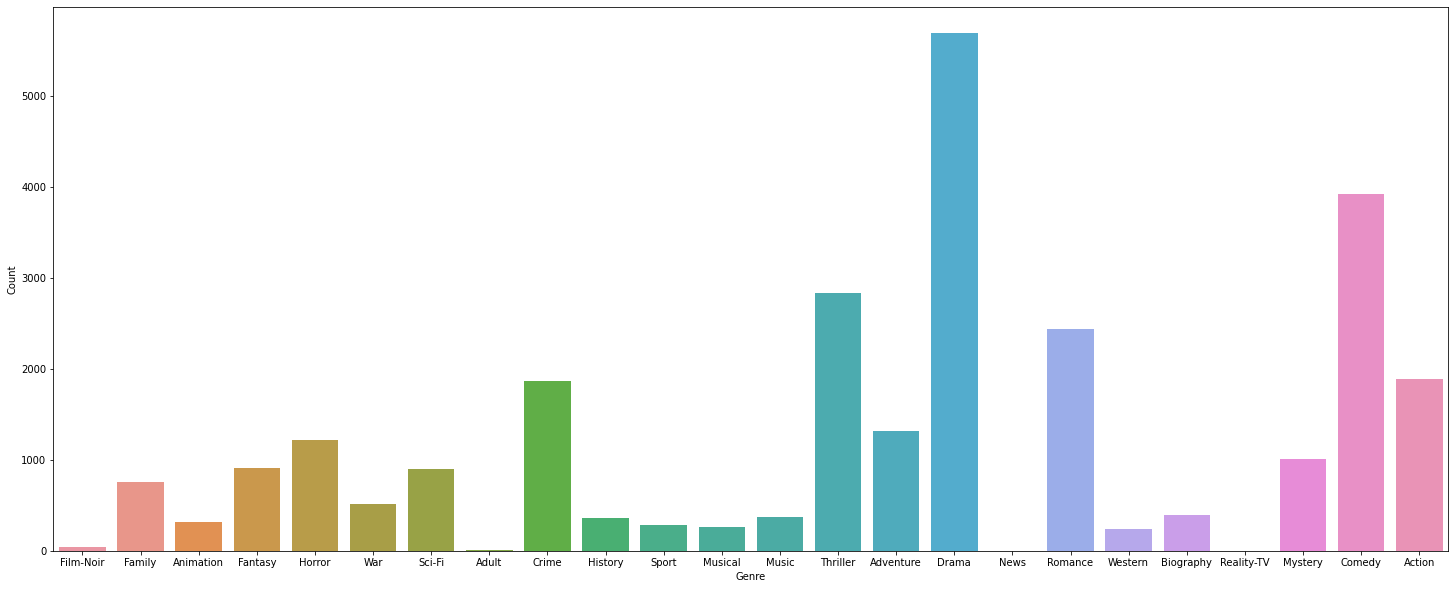

In [ ]:
genre_count = data[genres].sum()
plt.figure(figsize=(25, 10))
gcf = genre_count.to_frame(name='Count').reset_index()
gcf.rename(columns={'index':'Genre'}, inplace=True)
sn.barplot(data=gcf, x='Genre', y='Count')